Accuracy: 0.7406
RMSE: 0.4134


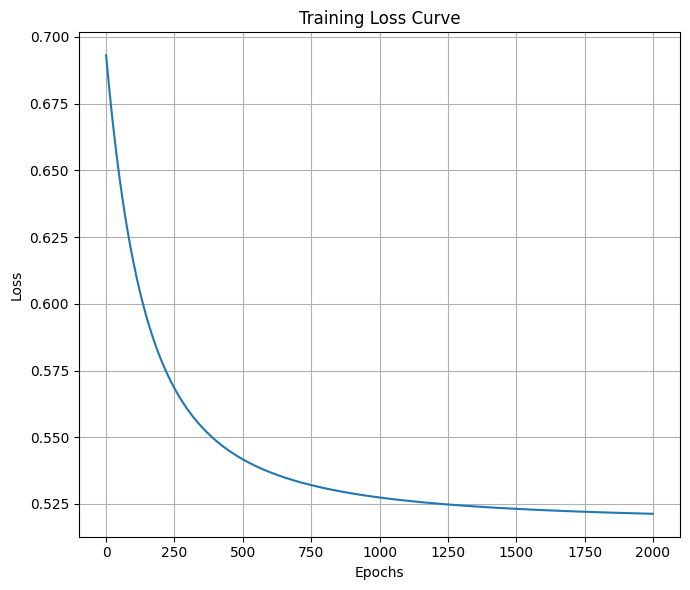

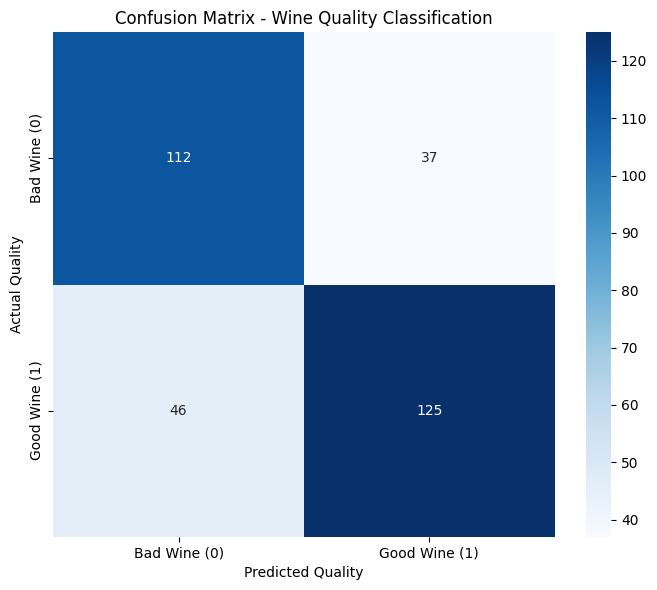

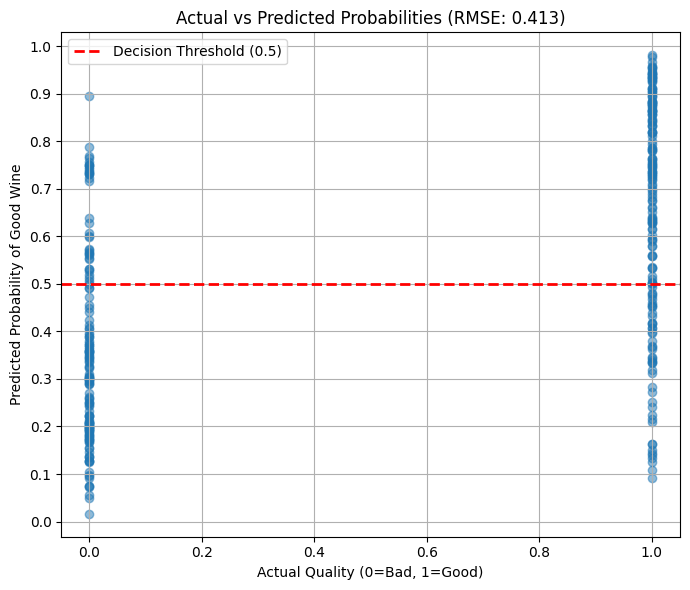

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from math import sqrt

# Load dataset
df = pd.read_csv("winequality-red.csv", sep=";")

X = df.drop("quality", axis=1).values
y = (df["quality"] >= 6).astype(int).values.reshape(-1, 1)   # Good wine = 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        self.losses = []

        for _ in range(self.epochs):
            # Linear model
            linear_output = np.dot(X, self.weights) + self.bias
            # Apply sigmoid
            y_pred = sigmoid(linear_output)

            # Compute loss (binary cross-entropy)
            loss = -(1/n_samples) * np.sum(
                y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9)
            )
            self.losses.append(loss)

            # Gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_output)
        return (y_pred >= 0.5).astype(int)

    def predict_proba(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_output)

# Train model
model = LogisticRegression(lr=0.01, epochs=2000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))
print(f"RMSE: {rmse:.4f}")

# Plot loss curve
plt.figure(figsize=(7, 6))
plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_curve.png')
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Wine (0)', 'Good Wine (1)'],
            yticklabels=['Bad Wine (0)', 'Good Wine (1)'])
plt.title('Confusion Matrix - Wine Quality Classification')
plt.ylabel('Actual Quality')
plt.xlabel('Predicted Quality')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# plot of actual vs predicted probabilities
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_proba, alpha=0.5)
plt.axhline(y=0.5, color='r', linestyle='--', lw=2, label='Decision Threshold (0.5)')
plt.xlabel('Actual Quality (0=Bad, 1=Good)')
plt.ylabel('Predicted Probability of Good Wine')
plt.title('Actual vs Predicted Probabilities (RMSE: {:.3f})'.format(rmse))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Training set size: 1279
Validation set size: 160
Test set size: 160
Validation Accuracy: 0.5250
Validation RMSE: 0.7866
Test Accuracy: 0.6000
Test RMSE: 0.7746


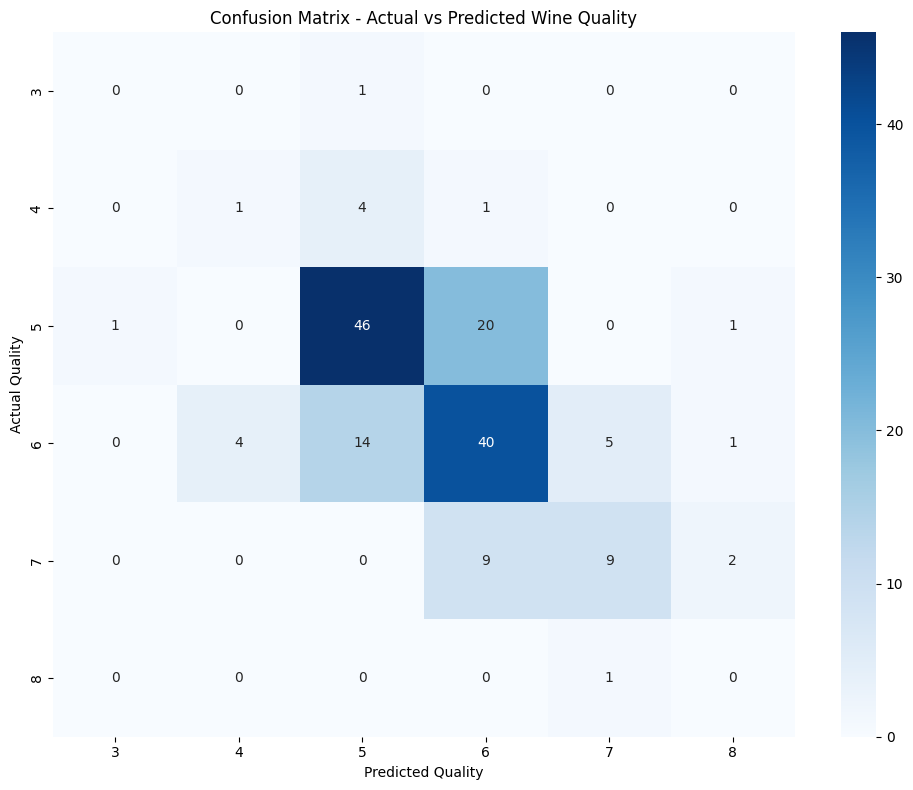

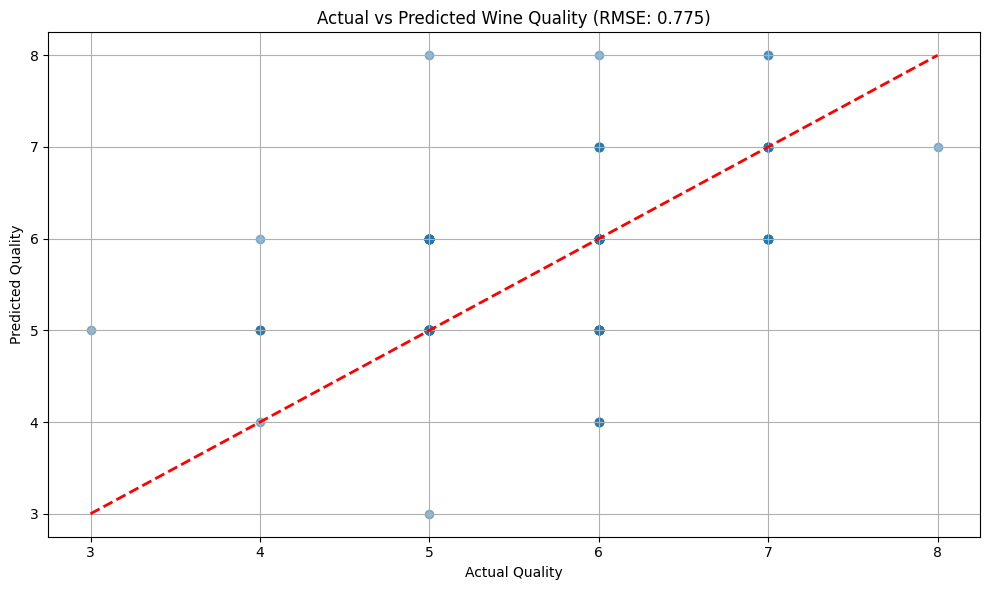

' \n# example prediction\nprint("\nSome example predictions:")\nresults = pd.DataFrame({\'Actual\': y_test.values, \'Predicted\': y_test_pred})\nprint(results.head(20))\n\n '

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Load the dataset
data = pd.read_csv('winequality-red.csv', delimiter=';')

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_val_pred = nb_model.predict(X_val_scaled)

# Evaluate on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_rmse = sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")

# Make predictions on test set
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Calculate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix - Actual vs Predicted Wine Quality')
plt.ylabel('Actual Quality')
plt.xlabel('Predicted Quality')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality (RMSE: {:.3f})'.format(test_rmse))
plt.xticks(range(3, 9))
plt.yticks(range(3, 9))
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()

"""
# example prediction
print("\nSome example predictions:")
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})
print(results.head(20))

 """

